In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Analyse blosum parameters

On cherche les meilleurs paramètres openGap et extendGap

On trouve respectivement 14.3 et 2.9

ANALYSE BLOSUM PARAMETERS
Index(['seqName', 'SPS', 'time', 'iter', 'enf_mixte', 'vrac_mixte',
       'helice_mixte', 'struct_mixte', 'enf_propre', 'struct_propre',
       'helice_propre', 'openGap', 'extendGap'],
      dtype='object')
['BB11001' 'BB11002' 'BB11003' 'BB11004' 'BB11008' 'BB11009' 'BB11010']


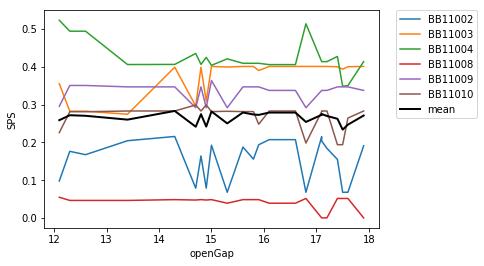

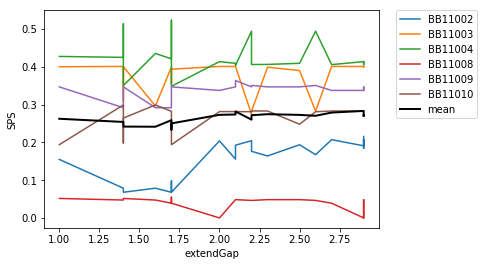

,SPS,time,enf_mixte,vrac_mixte,helice_mixte,struct_mixte,enf_propre,struct_propre,helice_propre,openGap,extendGap
iter,,,,,,,,,,,
5,0.283372,23.526248,0.0,2.0,4.0,1.0,0.0,0.0,4.0,14.3,2.9


In [31]:
print("ANALYSE BLOSUM PARAMETERS")

df = pd.read_csv("V_Multiple_InfoStructurale/blosum.csv")
print(df.columns)

seqNames = df.seqName.unique()
print(seqNames)

df = df[df["seqName"] != "BB11001"]
seqNames = seqNames[1:]

dfm = df.groupby("iter").mean()

for param in ["openGap", "extendGap"]:
    df = df.sort_values(param)
    for s in seqNames:
        plt.plot(df[df["seqName"] == s][param], df[df["seqName"] == s]["SPS"], label = s)
    dfm = dfm.sort_values(param)
    plt.plot(dfm[param], dfm["SPS"], '-', color = 'black', linewidth = 2.0, label = "mean")   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(param)
    plt.ylabel("SPS")
    plt.show()
    
dfm[dfm["SPS"] == max(dfm["SPS"])]

# Analyse enf_mixte parameter

On cherche le meilleur paramètre enf_mixte avec les paramètres openGap et extendGap fixés comme précédemment

On trouve un score optimal de 0.274484 qui est inférieur au score sans le paramètre. On en déduis que l'effet n'a soit aucune influence sur l'alignement, soit que l'enfouissement est mal pris en compte

ANALYSE ENF_MIXTE PARAMETERS
Index(['seqName', 'SPS', 'time', 'iter', 'enf_mixte', 'vrac_mixte',
       'helice_mixte', 'struct_mixte', 'enf_propre', 'struct_propre',
       'helice_propre', 'openGap', 'extendGap'],
      dtype='object')


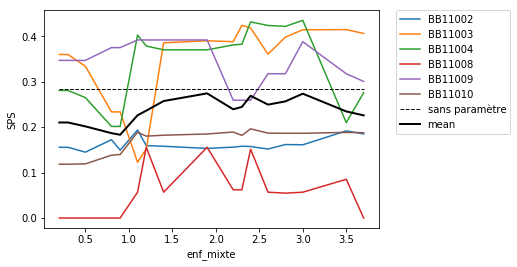

,SPS,time,enf_mixte,vrac_mixte,helice_mixte,struct_mixte,enf_propre,struct_propre,helice_propre,openGap,extendGap
iter,,,,,,,,,,,
7,0.274484,31.907121,1.9,0.0,0.0,0.0,0.0,0.0,4.0,14.3,2.9


In [32]:
print("ANALYSE ENF_MIXTE PARAMETERS")

df = pd.read_csv("V_Multiple_InfoStructurale/enf_mixte_pluscorrection.csv")
print(df.columns)

dfm = df.groupby("iter").mean()

for param in ["enf_mixte"]:
    df = df.sort_values(param)
    for s in seqNames:
        plt.plot(df[df["seqName"] == s][param], df[df["seqName"] == s]["SPS"], label = s)
    dfm = dfm.sort_values(param)
    plt.plot([min(df[df["seqName"] == s][param]), max(df[df["seqName"] == s][param])], [0.283372, 0.283372], 'r--',
            color = 'black', linewidth = 1.0, label = "sans paramètre")
    plt.plot(dfm[param], dfm["SPS"], '-', color = 'black', linewidth = 2.0, label = "mean")   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(param)
    plt.ylabel("SPS")
    plt.show()
    
dfm[dfm["SPS"] == max(dfm["SPS"])]

# Analyse struct_mixte parameters

On cherche les meilleurs paramètres struct_mixte, vrac_mixte, helice_mixte avec les paramètres openGap et extendGap fixés comme précédemment

On trouve un score optimal de 0.346592 qui est supérieur de 22% au score sans le paramètre. On en déduis que l'ajout d'information structurale permet d'augmenter le score SPS. On est content :-)

ANALYSE STRUCT_MIXTE PARAMETERS
Index(['seqName', 'SPS', 'time', 'iter', 'enf_mixte', 'vrac_mixte',
       'helice_mixte', 'struct_mixte', 'enf_propre', 'struct_propre',
       'helice_propre', 'openGap', 'extendGap'],
      dtype='object')


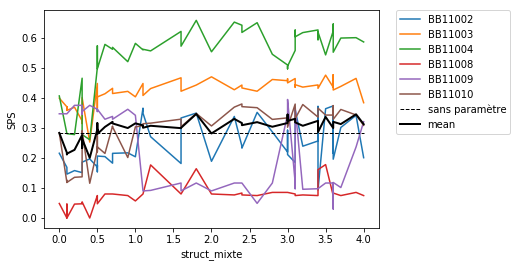

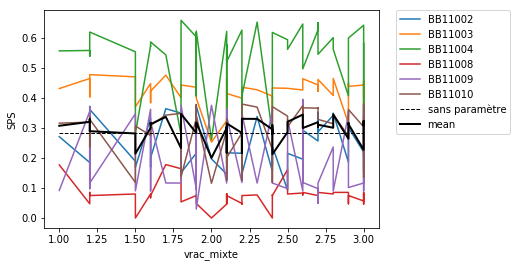

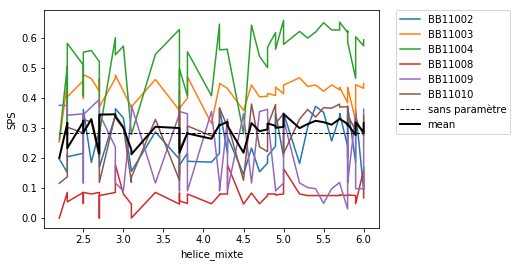

,SPS,time,enf_mixte,vrac_mixte,helice_mixte,struct_mixte,enf_propre,struct_propre,helice_propre,openGap,extendGap
iter,,,,,,,,,,,
21,0.346592,32.153528,0.0,1.8,5.0,1.8,0.0,0.0,4.0,14.3,2.9


In [34]:
print("ANALYSE STRUCT_MIXTE PARAMETERS")

df = pd.read_csv("V_Multiple_InfoStructurale/struct_mixte_pluscorrection.csv")
print(df.columns)

dfm = df.groupby("iter").mean()

for param in ["struct_mixte", "vrac_mixte", "helice_mixte"]:
    df = df.sort_values(param)
    for s in seqNames:
        plt.plot(df[df["seqName"] == s][param], df[df["seqName"] == s]["SPS"], label = s)
    dfm = dfm.sort_values(param)
    plt.plot([min(df[df["seqName"] == s][param]), max(df[df["seqName"] == s][param])], [0.283372, 0.283372], 'r--',
            color = 'black', linewidth = 1.0, label = "sans paramètre")
    plt.plot(dfm[param], dfm["SPS"], '-', color = 'black', linewidth = 2.0, label = "mean")   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(param)
    plt.ylabel("SPS")
    plt.show()
    
dfm[dfm["SPS"] == max(dfm["SPS"])]